In [3]:
import pandas as pd
import numpy as np
from astropy.time import Time
import pandas as pd


In [5]:
# Load the data
df = pd.read_csv('../data/tess-stitched/raw/toi4409-full-tess-stitched-nonans-filtered1day-sorted_converted.csv')

<Axes: xlabel='time', ylabel='flux'>

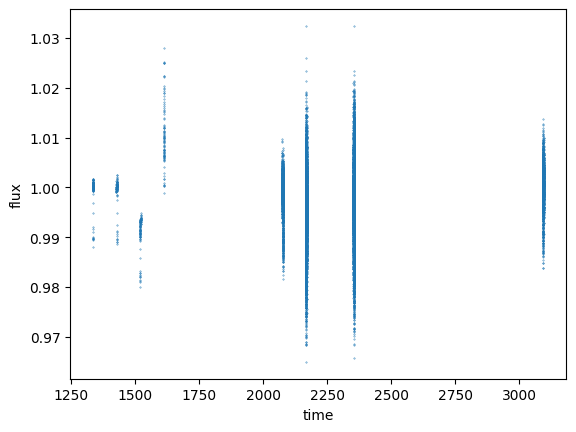

In [6]:
# Plot the data
df.plot(x='time', y='flux', kind='scatter', s=0.1)


<Axes: xlabel='time', ylabel='flux'>

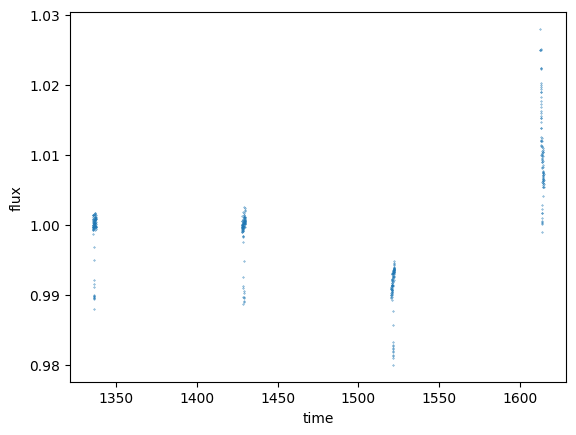

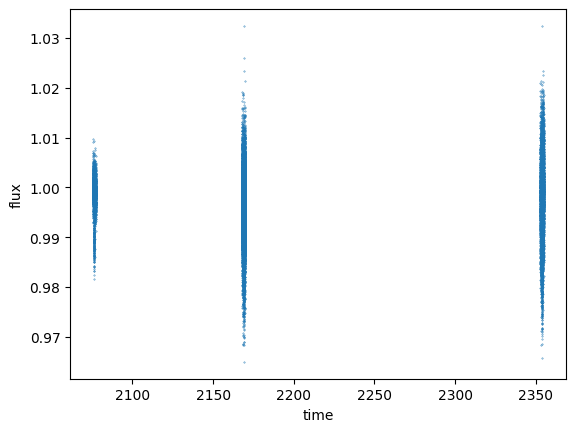

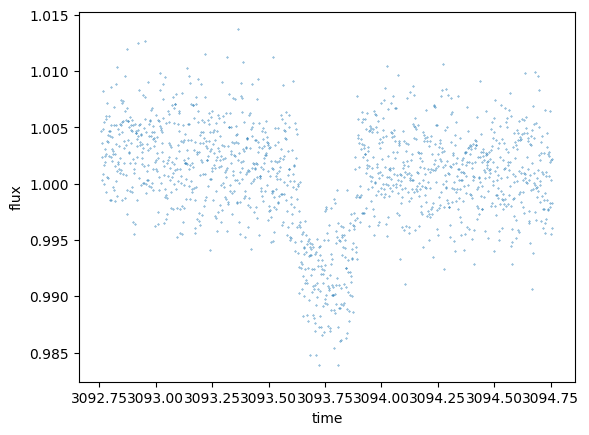

In [8]:
# Separate the data in 3 parts: before 1750, between, and after 2750
df1 = df[df['time'] < 1750]
df2 = df[(df['time'] >= 1750) & (df['time'] <= 2750)]
df3 = df[df['time'] > 2750]

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)
df2.plot(x='time', y='flux', kind='scatter', s=0.1)
df3.plot(x='time', y='flux', kind='scatter', s=0.1)


In [9]:
# Save the three dataframe files as csv with names 4409-tess-lightcurves-1800s, 600s, and 180s
df1.to_csv('../data/raw/tess-stitched/4409-tess-lightcurves-1800s.csv', index=False)
df2.to_csv('../data/raw/tess-stitched/4409-tess-lightcurves-600s.csv', index=False)
df3.to_csv('../data/raw/tess-stitched/4409-tess-lightcurves-180s.csv', index=False)


In [10]:
# Modify each csv file so that the first row is commented with # in the beginning
for filename in ['4409-tess-lightcurves-1800s.csv', '4409-tess-lightcurves-600s.csv', '4409-tess-lightcurves-180s.csv']:
    with open('../data/tess-stitched/raw/' + filename, 'r') as f:
        lines = f.readlines()
    lines[0] = '#' + lines[0]
    with open('../data/tess-stitched/raw/' + filename, 'w') as f:
        f.writelines(lines)

In [13]:
# Load the data from the csvs
df1 = pd.read_csv('../data/tess-stitched/raw/4409-tess-lightcurves-1800s.csv')
df2 = pd.read_csv('../data/tess-stitched/raw/4409-tess-lightcurves-600s.csv')
df3 = pd.read_csv('../data/tess-stitched/raw/4409-tess-lightcurves-180s.csv')

# In memory, name the colums as if the first line was not commented
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')


In [5]:
# Convert the data into allesfitter-compliant format
def convert_to_scientific_notation(input_csv, output_csv=None):
    # Read the CSV file into a DataFrame unless a DataFrame is passed
    if isinstance(input_csv, str):
        df = pd.read_csv(input_csv)
    else:
        df = input_csv
        
    # Apply scientific notation with 18 digits after the decimal to each column
    for col in df.columns:
        # Check if the column is of a numeric type
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].apply(lambda x: format(x, '.18e'))

    # If an output file is specified, save the result to this file
    if output_csv:
        df.to_csv(output_csv, index=False)
    else:
        # Otherwise, return the DataFrame
        return df


# df_formatted = convert_to_scientific_notation(df1)


In [18]:
# Print the first 5 rows of the DataFrame
df_formatted.head()

,time,flux,flux_err
0,1.335427156297955662e+03,1.000000000000000000e+00,6.928035198786999587e-04
1,1.335447989991616623e+03,9.995062641602320275e-01,6.925134161999999894e-04
2,1.335468823685102052e+03,9.986788521063427737e-01,6.923356933784999929e-04
3,1.335489657378354877e+03,9.994022441459066153e-01,6.923162921229999468e-04
4,1.335510491071434217e+03,1.001408924542382506e+00,6.923965205850999465e-04


In [20]:
# For each of the above 3 files, save the DataFrame as a csv file, with the first line commented with #, and the rest of the lines in scientific notation, in the directory ../data/tess-stitched/allesfitter_converted
convert_to_scientific_notation(df1).to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s.csv', index=False)
convert_to_scientific_notation(df2).to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-600s.csv', index=False)
convert_to_scientific_notation(df3).to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-180s.csv', index=False)

# Comment with # the first line of each of the above 3 files
for filename in ['4409-tess-lightcurves-1800s.csv', '4409-tess-lightcurves-600s.csv', '4409-tess-lightcurves-180s.csv']:
    with open('../data/tess-stitched/allesfitter_converted/' + filename, 'r') as f:
        lines = f.readlines()
    lines[0] = '#' + lines[0]
    with open('../data/tess-stitched/allesfitter_converted/' + filename, 'w') as f:
        f.writelines(lines)


In [45]:
# Load the data again from the csvs, and now convert the first column from BTJD to BJD
def convert_btjd_to_bjd(input_csv, output_csv=None):
    # Read the CSV file into a DataFrame unless a DataFrame is passed
    if isinstance(input_csv, str):
        df = pd.read_csv(input_csv)
    else:
        df = input_csv
        
    # Convert the first column from BTJD to BJD by adding 2457000.0
    df['time'] = df['time'].apply(lambda x: x + 2457000.0)

    # If an output file is specified, save the result to this file
    if output_csv:
        df.to_csv(output_csv, index=False)
    else:
        # Otherwise, return the DataFrame
        return df

# Load the data from the csvs
df1 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s.csv')
df2 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-600s.csv')
df3 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-180s.csv')

# Delete the # from the first line of each of the above 3 dataframes
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')

# Convert the first column from BTJD to BJD
df1 = convert_btjd_to_bjd(df1)
df2 = convert_btjd_to_bjd(df2)
df3 = convert_btjd_to_bjd(df3)

# Convert to scientific notation
df1 = convert_to_scientific_notation(df1)
df2 = convert_to_scientific_notation(df2)
df3 = convert_to_scientific_notation(df3)

# Comment the first line of each of the above 3 dataframes with #
# df1.columns = df1.columns.str.replace('#', '')
# df2.columns = df2.columns.str.replace('#', '')
# df3.columns = df3.columns.str.replace('#', '')

# Save the dataframes as csv files
df1.to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s_mjd.csv', index=False)
df2.to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-600s_bjd.csv', index=False)
df3.to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-180s_bjd.csv', index=False)

# Plot the data
# df1.plot(x='time', y='flux', kind='scatter', s=0.1)


<Axes: xlabel='time', ylabel='flux'>

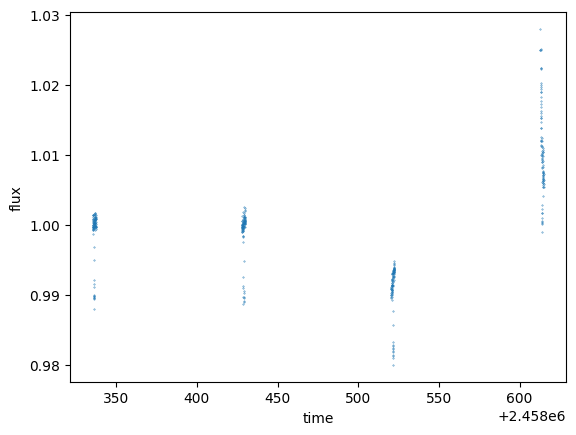

In [46]:
# Load the data from the csvs
df1 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s_bjd.csv')
df2 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-600s_bjd.csv')
df3 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-180s_bjd.csv')

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)

In [52]:
# Now same as before, but convert to MJD and save
# Load the data from the csvs
df1 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s_bjd.csv')
df2 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-600s_bjd.csv')
df3 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-180s_bjd.csv')

# Convert the first column from BJD to MJD by subtracting 2400000.5
df1['time'] = df1['time'].apply(lambda x: x - 2400000.5)
df2['time'] = df2['time'].apply(lambda x: x - 2400000.5)
df3['time'] = df3['time'].apply(lambda x: x - 2400000.5)

# Convert to scientific notation
df1 = convert_to_scientific_notation(df1)
df2 = convert_to_scientific_notation(df2)
df3 = convert_to_scientific_notation(df3)

# Save the dataframes as csv files
df1.to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s_mjd.csv', index=False)
df2.to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-600s_mjd.csv', index=False)
df3.to_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-180s_mjd.csv', index=False)


<Axes: xlabel='time', ylabel='flux'>

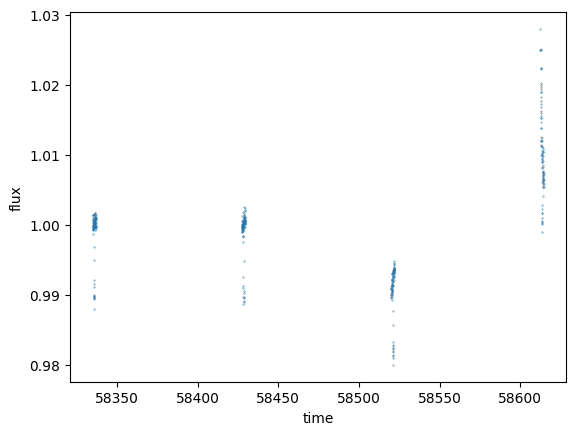

In [54]:
# Load the data from the csvs
df1 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-1800s_mjd.csv')
df2 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-600s_mjd.csv')
df3 = pd.read_csv('../data/tess-stitched/allesfitter_converted/4409-tess-lightcurves-180s_mjd.csv')

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)


In [59]:
# Now handle the WINE files


def convert_dat_to_csv(dat_file, csv_file):
    # Read the .dat file, skipping the first line
    df = pd.read_csv(dat_file, delim_whitespace=True, skiprows=1, header=None, names=['time', 'flux', 'flux_err'])

    # Convert BJD to MJD (simplified conversion)
    # df['time'] = df['time'] - 2400000.5

    # If the filename contains CHAT, then sum 1 to the second column to normalize around 1.0. Convert from string to float first
    if 'CHAT' in dat_file:
        df['flux'] = df['flux'].apply(lambda x: float(x) + 1.0)
        
    # Apply scientific notation with 18 digits after the decimal
    for col in df.columns:
        df[col] = df[col].apply(lambda x: format(x, '.18e'))
            
    # Write to a CSV file with a new header
    with open(csv_file, 'w') as f:
        f.write('#time,flux,flux_err\n')
        df.to_csv(f, index=False, header=False)
    # Delete empty lines
    with open(csv_file, 'r') as f:
        lines = f.readlines()
    with open(csv_file, 'w') as f:
        f.writelines([line for line in lines if line.strip()])    
    
    
convert_dat_to_csv('../data/wine/lcs/LC_CHAT_20191110_TIC382200986.01-i_mags.dat', '../data/wine/allesfitter_converted/LC_CHAT_20191110_TIC382200986.01-i_mags.csv')
# Also for the OMES files, LC_OMES_20211119_TIC382200986.01-r_norm_flux and LC_OMES_20221124_TIC382200986.01-i_norm_flux
convert_dat_to_csv('../data/wine/lcs/LC_OMES_20211119_TIC382200986.01-r_norm_flux.dat', '../data/wine/allesfitter_converted/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv')
convert_dat_to_csv('../data/wine/lcs/LC_OMES_20221124_TIC382200986.01-i_norm_flux.dat', '../data/wine/allesfitter_converted/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv')


<Axes: xlabel='time', ylabel='flux'>

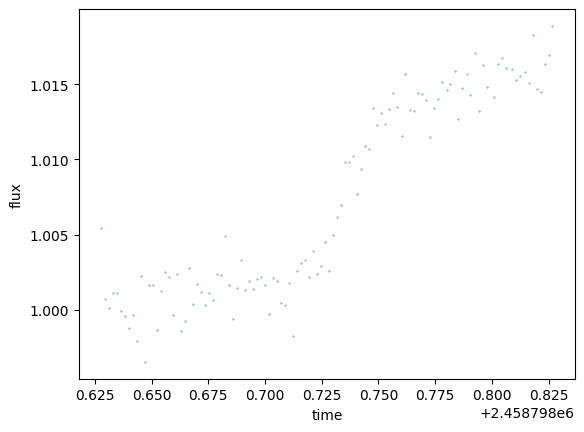

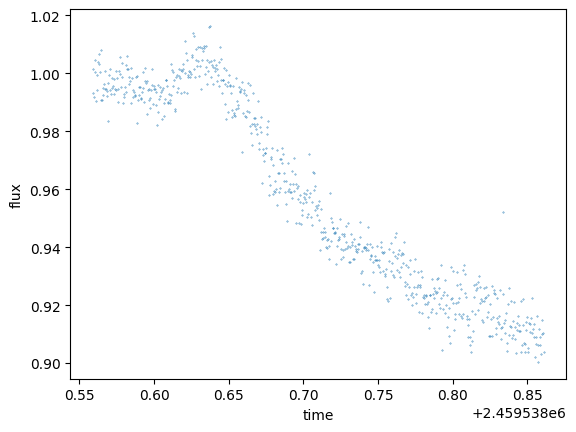

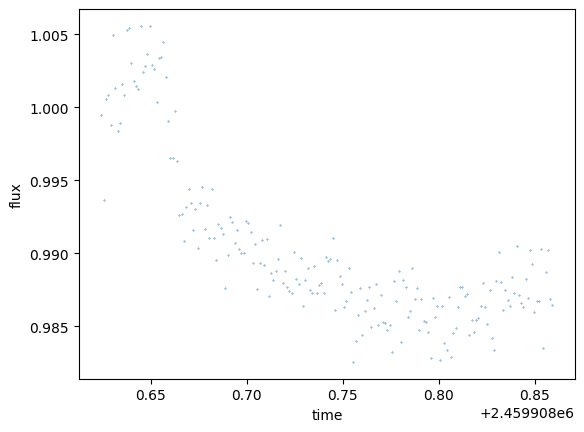

: 

In [61]:
# Load the above 3 files
df1 = pd.read_csv('../data/wine/allesfitter_converted/LC_CHAT_20191110_TIC382200986.01-i_mags.csv')
df2 = pd.read_csv('../data/wine/allesfitter_converted/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv')
df3 = pd.read_csv('../data/wine/allesfitter_converted/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv')

# Remove the # from the first line of each of the above 3 files
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)
df2.plot(x='time', y='flux', kind='scatter', s=0.1)
df3.plot(x='time', y='flux', kind='scatter', s=0.1)


In [11]:
# Load the raw astep data from "data/astep/raw/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv", also TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements, TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements, and TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements
df1 = pd.read_csv('../data/astep/raw/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv')
df2 = pd.read_csv('../data/astep/raw/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv')
df3 = pd.read_csv('../data/astep/raw/TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv')
df4 = pd.read_csv('../data/astep/raw/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv')

# Keep only the first 3 columns, and rename them to time, flux, flux_err
df1 = df1.iloc[:, :3]
df2 = df2.iloc[:, :3]
df3 = df3.iloc[:, :3]
df4 = df4.iloc[:, :3]
df1.columns = ['time', 'flux', 'flux_err']
df2.columns = ['time', 'flux', 'flux_err']
df3.columns = ['time', 'flux', 'flux_err']
df4.columns = ['time', 'flux', 'flux_err']

# For df1 and 4, add 2450000.0 to the first column, and for 2 and 3, add 2460000.0
df1['time'] = df1['time'].apply(lambda x: x + 2450000.0)
df2['time'] = df2['time'].apply(lambda x: x + 2460000.0)
df3['time'] = df3['time'].apply(lambda x: x + 2460000.0)
df4['time'] = df4['time'].apply(lambda x: x + 2450000.0)

# Convert to scientific notation
df1 = convert_to_scientific_notation(df1)
df2 = convert_to_scientific_notation(df2)
df3 = convert_to_scientific_notation(df3)
df4 = convert_to_scientific_notation(df4)

# Save the dataframes as csv files
df1.to_csv('../data/astep/allesfitter_converted/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv', index=False)
df2.to_csv('../data/astep/allesfitter_converted/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv', index=False)
df3.to_csv('../data/astep/allesfitter_converted/TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv', index=False)
df4.to_csv('../data/astep/allesfitter_converted/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv', index=False)

# Comment the first line of each of the above 4 files with #
for filename in ['TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv', 'TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv', 'TIC382200986-01_20230528_ASTEP-ANTARCTICA_R_measurements.csv', 'TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv']:
    with open('../data/astep/allesfitter_converted/' + filename, 'r') as f:
        lines = f.readlines()
    lines[0] = '#' + lines[0]
    with open('../data/astep/allesfitter_converted/' + filename, 'w') as f:
        f.writelines(lines)
        


<Axes: xlabel='time', ylabel='flux'>

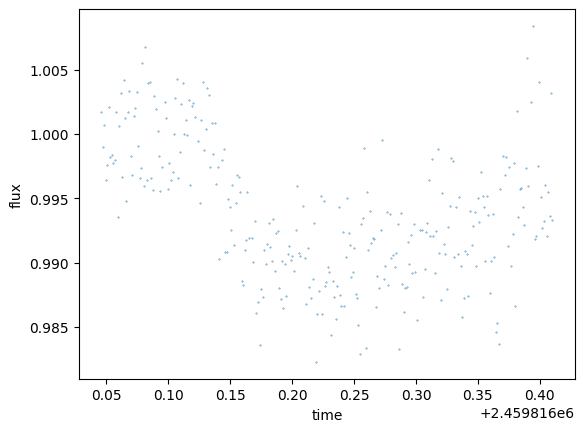

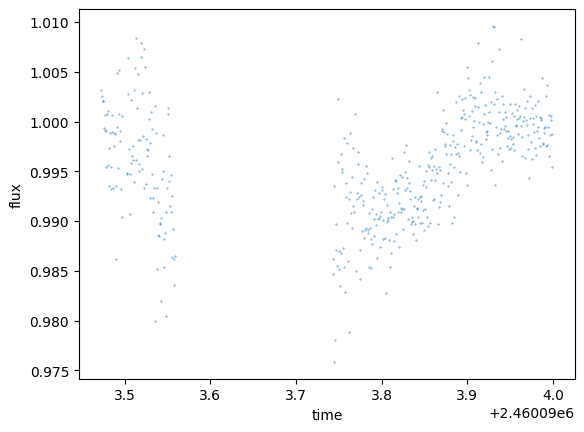

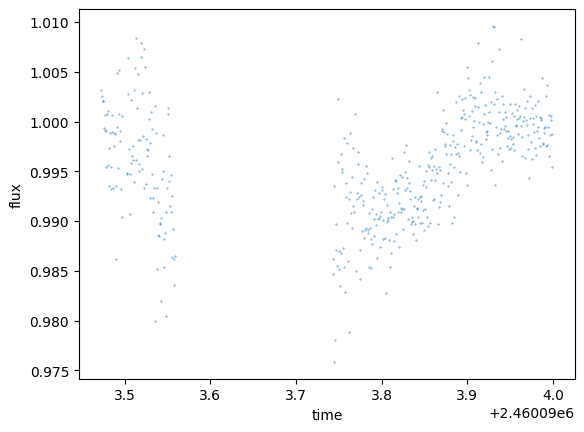

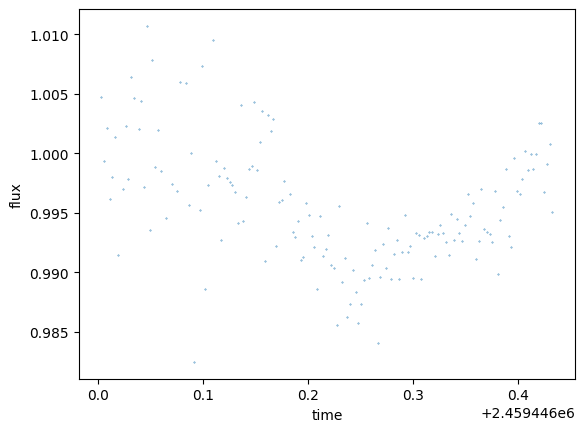

In [12]:
# Load the data from the csvs
df1 = pd.read_csv('../data/astep/allesfitter_converted/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv')
df2 = pd.read_csv('../data/astep/allesfitter_converted/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv')
df3 = pd.read_csv('../data/astep/allesfitter_converted/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv')
df4 = pd.read_csv('../data/astep/allesfitter_converted/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv')

# Uncomment the first line of each of the above 4 files
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')
df4.columns = df4.columns.str.replace('#', '')

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)
df2.plot(x='time', y='flux', kind='scatter', s=0.1)
df3.plot(x='time', y='flux', kind='scatter', s=0.1)
df4.plot(x='time', y='flux', kind='scatter', s=0.1)



In [ ]:
# # Combine all astep files into one
# df1 = pd.read_csv('../data/astep/allesfitter_converted/TIC382200986-01_20220824_ASTEP-ANTARCTICA_R_measurements.csv')
# df2 = pd.read_csv('../data/astep/allesfitter_converted/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv')
# df3 = pd.read_csv('../data/astep/allesfitter_converted/TIC382200986-01_20230528_ASTEP-ANTARCTICA_B_measurements.csv')
# df4 = pd.read_csv('../data/astep/allesfitter_converted/TIC382200986-32_20210819_ASTEP-ANTARCTICA_Rc_measurements.csv')

# # Delete the # from the first line of each of the above 4 files
# df1.columns = df1.columns.str.replace('#', '')
# df2.columns = df2.columns.str.replace('#', '')
# df3.columns = df3.columns.str.replace('#', '')
# df4.columns = df4.columns.str.replace('#', '')

# # Concatenate the dataframes
# df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# # Sort the dataframe by time
# df = df.sort_values(by=['time'])
